In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from prophet.forecaster import Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

c:\Users\aless\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [100]:
inf = pd.read_csv(Inflazione.csv")
inf.head()

,DATE,TIME PERIOD,HICP - Overall index (ICP.M.U2.N.000000.4.ANR)
0,1997-01-31,1997Jan,2.0
1,1997-02-28,1997Feb,1.8
2,1997-03-31,1997Mar,1.6
3,1997-04-30,1997Apr,1.3
4,1997-05-31,1997May,1.4


In [101]:
inf = inf.rename(columns={"HICP - Overall index (ICP.M.U2.N.000000.4.ANR)": "Inflation_rate"})
inf.head()


,DATE,TIME PERIOD,Inflation_rate
0,1997-01-31,1997Jan,2.0
1,1997-02-28,1997Feb,1.8
2,1997-03-31,1997Mar,1.6
3,1997-04-30,1997Apr,1.3
4,1997-05-31,1997May,1.4


In [102]:
inf['DATE'] = pd.to_datetime(inf['DATE'])
inf.head()

,DATE,TIME PERIOD,Inflation_rate
0,1997-01-31,1997Jan,2.0
1,1997-02-28,1997Feb,1.8
2,1997-03-31,1997Mar,1.6
3,1997-04-30,1997Apr,1.3
4,1997-05-31,1997May,1.4


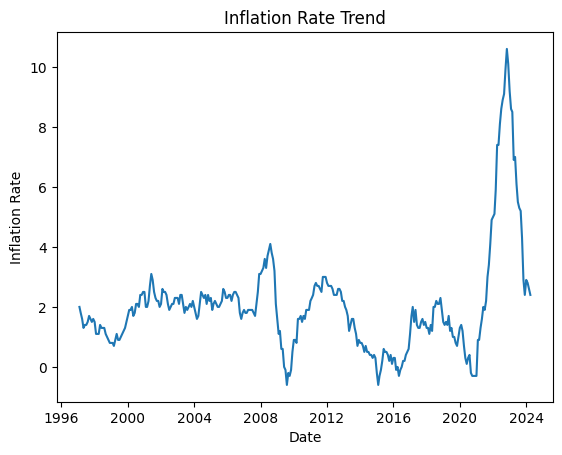

In [107]:
# Inflation trend
plt.plot(inf['DATE'], inf['Inflation_rate'])
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Trend')
plt.show()

In [108]:
M1 = pd.read_csv(M1.csv")
M1.head()

,DATE,TIME PERIOD,"Monetary aggregate M1 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.N.V.M10.X.4.U2.2300.Z01.E)"
0,1980-02-29,1980Feb,-4779
1,1980-03-31,1980Mar,7777
2,1980-04-30,1980Apr,1095
3,1980-05-31,1980May,3340
4,1980-06-30,1980Jun,14880


In [109]:
M1 = M1.rename(columns={"Monetary aggregate M1 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.N.V.M10.X.4.U2.2300.Z01.E)": "M1"})
M1['DATE'] = pd.to_datetime(M1['DATE'])
M1.head()


,DATE,TIME PERIOD,M1
0,1980-02-29,1980Feb,-4779
1,1980-03-31,1980Mar,7777
2,1980-04-30,1980Apr,1095
3,1980-05-31,1980May,3340
4,1980-06-30,1980Jun,14880


In [110]:
M2 = pd.read_csv(M2.csv")
M2.head()

,DATE,TIME PERIOD,"Monetary aggregate M2 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.N.V.M20.X.4.U2.2300.Z01.E)"
0,1980-02-29,1980Feb,-257
1,1980-03-31,1980Mar,10039
2,1980-04-30,1980Apr,2006
3,1980-05-31,1980May,5559
4,1980-06-30,1980Jun,14423


In [111]:
M2 = M2.rename(columns={"Monetary aggregate M2 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.N.V.M20.X.4.U2.2300.Z01.E)": "M2"})
M2['DATE'] = pd.to_datetime(M2['DATE'])
M2.head()

,DATE,TIME PERIOD,M2
0,1980-02-29,1980Feb,-257
1,1980-03-31,1980Mar,10039
2,1980-04-30,1980Apr,2006
3,1980-05-31,1980May,5559
4,1980-06-30,1980Jun,14423


In [112]:
M3 = pd.read_csv(M3.csv")
M3.head()

,DATE,TIME PERIOD,"Monetary aggregate M3 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.Y.V.M30.X.4.U2.2300.Z01.E)"
0,1980-02-29,1980Feb,8116
1,1980-03-31,1980Mar,11708
2,1980-04-30,1980Apr,5411
3,1980-05-31,1980May,8033
4,1980-06-30,1980Jun,8485


In [113]:
M3 = M3.rename(columns={"Monetary aggregate M3 reported by MFIs, central gov. and post office giro institutions in the euro area (transactions) (BSI.M.U2.Y.V.M30.X.4.U2.2300.Z01.E)": "M3"})
M3['DATE'] = pd.to_datetime(M3['DATE'])
M3.head()

,DATE,TIME PERIOD,M3
0,1980-02-29,1980Feb,8116
1,1980-03-31,1980Mar,11708
2,1980-04-30,1980Apr,5411
3,1980-05-31,1980May,8033
4,1980-06-30,1980Jun,8485


In [114]:
merged = pd.merge(M1, M2, on = ['TIME PERIOD', 'DATE'])
merged.head()

,DATE,TIME PERIOD,M1,M2
0,1980-02-29,1980Feb,-4779,-257
1,1980-03-31,1980Mar,7777,10039
2,1980-04-30,1980Apr,1095,2006
3,1980-05-31,1980May,3340,5559
4,1980-06-30,1980Jun,14880,14423


In [115]:
mon = pd.merge(merged, M3, on = ['TIME PERIOD', 'DATE'])
mon.head()

,DATE,TIME PERIOD,M1,M2,M3
0,1980-02-29,1980Feb,-4779,-257,8116
1,1980-03-31,1980Mar,7777,10039,11708
2,1980-04-30,1980Apr,1095,2006,5411
3,1980-05-31,1980May,3340,5559,8033
4,1980-06-30,1980Jun,14880,14423,8485


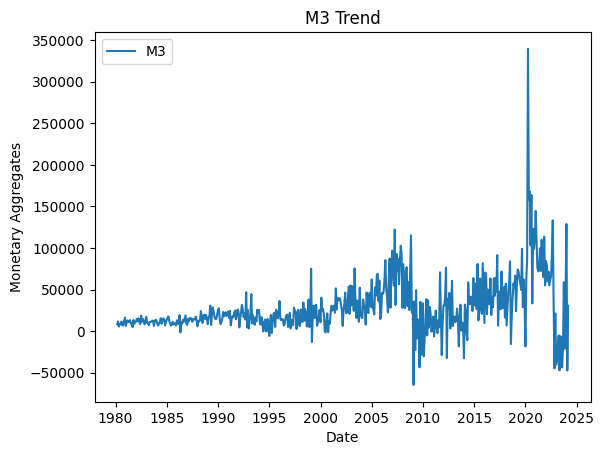

In [116]:
mon['DATE'] = pd.to_datetime(mon['DATE'])

# Plot M3
plt.plot(mon['DATE'], mon['M3'], label='M3')

# Labels 
plt.xlabel('Date')
plt.ylabel('Monetary Aggregates')
plt.title('M3 Trend')
plt.legend()

# Mostra il plot
plt.show()

In [117]:
merged = pd.merge(mon, inf, on = ['TIME PERIOD', 'DATE'])
merged.head()

,DATE,TIME PERIOD,M1,M2,M3,Inflation_rate
0,1997-01-31,1997Jan,-82825,-63287,3186,2.0
1,1997-02-28,1997Feb,-5135,-6089,13469,1.8
2,1997-03-31,1997Mar,15149,5103,7076,1.6
3,1997-04-30,1997Apr,147,-1618,7200,1.3
4,1997-05-31,1997May,20404,17787,28123,1.4


In [118]:
UR = pd.read_csv(UR.csv")
UR.head()

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,indic,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EI_LMHR_M(1.0),05/04/24 23:00:00,M,PC_ACT,NSA,LM-UN-T-TOT,EA20,2000-01,9.5,NaN
1,ESTAT:EI_LMHR_M(1.0),05/04/24 23:00:00,M,PC_ACT,NSA,LM-UN-T-TOT,EA20,2000-02,9.7,NaN
2,ESTAT:EI_LMHR_M(1.0),05/04/24 23:00:00,M,PC_ACT,NSA,LM-UN-T-TOT,EA20,2000-03,9.5,NaN
3,ESTAT:EI_LMHR_M(1.0),05/04/24 23:00:00,M,PC_ACT,NSA,LM-UN-T-TOT,EA20,2000-04,9.2,NaN
4,ESTAT:EI_LMHR_M(1.0),05/04/24 23:00:00,M,PC_ACT,NSA,LM-UN-T-TOT,EA20,2000-05,8.9,NaN


In [119]:
UR = UR[UR['geo'] == 'EA20']
UR = UR.drop(columns = ['DATAFLOW', 'LAST UPDATE', 'freq','unit', 's_adj',	'indic',	'geo', 'OBS_FLAG'])
UR = UR.rename(columns = {"OBS_VALUE": "UR"})
UR.head()

,TIME_PERIOD,UR
0,2000-01,9.5
1,2000-02,9.7
2,2000-03,9.5
3,2000-04,9.2
4,2000-05,8.9


In [120]:
UR = UR.rename(columns = {"TIME_PERIOD": "DATE"})

In [121]:
# Standardizzazione delle date nel formato "anno-mese"
merged['DATE'] = merged['DATE'].dt.to_period('M')


In [122]:
merged.drop_duplicates()
merged.head()


,DATE,TIME PERIOD,M1,M2,M3,Inflation_rate
0,1997-01,1997Jan,-82825,-63287,3186,2.0
1,1997-02,1997Feb,-5135,-6089,13469,1.8
2,1997-03,1997Mar,15149,5103,7076,1.6
3,1997-04,1997Apr,147,-1618,7200,1.3
4,1997-05,1997May,20404,17787,28123,1.4


In [123]:
UR.drop_duplicates()
UR['DATE'] = pd.to_datetime(UR['DATE'])
UR.head()

,DATE,UR
0,2000-01-01,9.5
1,2000-02-01,9.7
2,2000-03-01,9.5
3,2000-04-01,9.2
4,2000-05-01,8.9


In [124]:
UR['DATE'] = UR['DATE'].dt.to_period('M')

In [125]:
merged1 = pd.merge(merged, UR, on = 'DATE')
merged1.head()

,DATE,TIME PERIOD,M1,M2,M3,Inflation_rate,UR
0,2000-01,2000Jan,9522,-6809,40225,1.9,9.5
1,2000-02,2000Feb,-8820,-2506,24389,1.9,9.7
2,2000-03,2000Mar,10771,7196,26671,2.0,9.5
3,2000-04,2000Apr,38830,36987,19774,1.7,9.2
4,2000-05,2000May,-14180,-3553,271,1.8,8.9


In [126]:
com = pd.read_csv(Commodities.csv")
com.head()

,DATE,TIME PERIOD,"ECB Commodity Price index, use-weighted (STS.M.I9.N.UWIE.CTOTNE.3.000)"
0,1996-01-31,1996Jan,70.90
1,1996-02-29,1996Feb,71.22
2,1996-03-31,1996Mar,70.04
3,1996-04-30,1996Apr,73.26
4,1996-05-31,1996May,74.11


In [127]:
com.rename(columns={'ECB Commodity Price index, use-weighted (STS.M.I9.N.UWIE.CTOTNE.3.000)': 'Commodities'}, inplace=True)
com.head()

,DATE,TIME PERIOD,Commodities
0,1996-01-31,1996Jan,70.90
1,1996-02-29,1996Feb,71.22
2,1996-03-31,1996Mar,70.04
3,1996-04-30,1996Apr,73.26
4,1996-05-31,1996May,74.11


In [131]:
com['DATE'] = pd.to_datetime(com['DATE'])
com['DATE'] = com['DATE'].dt.to_period('M')
com.head()

,DATE,TIME PERIOD,Commodities
0,1996-01,1996Jan,70.90
1,1996-02,1996Feb,71.22
2,1996-03,1996Mar,70.04
3,1996-04,1996Apr,73.26
4,1996-05,1996May,74.11


In [134]:
merged = pd.merge(merged1, com, on = ['DATE', 'TIME PERIOD'])
merged.head()


,DATE,TIME PERIOD,M1,M2,M3,Inflation_rate,UR,Commodities
0,2000-01,2000Jan,9522,-6809,40225,1.9,9.5,77.42
1,2000-02,2000Feb,-8820,-2506,24389,1.9,9.7,80.10
2,2000-03,2000Mar,10771,7196,26671,2.0,9.5,81.12
3,2000-04,2000Apr,38830,36987,19774,1.7,9.2,81.97
4,2000-05,2000May,-14180,-3553,271,1.8,8.9,84.82


In [135]:
ER = pd.read_csv(EUR_serie_storica_mensile.csv")
ER.head()

,Valuta,Codice ISO,Codice UIC,Quotazione,Convenzione di cambio,Data di riferimento
0,Euro,EUR,242,0.9867,Quantita' di valuta estera per 1 Dollaro,2000-01
1,Euro,EUR,242,1.0169,Quantita' di valuta estera per 1 Dollaro,2000-02
2,Euro,EUR,242,1.0370,Quantita' di valuta estera per 1 Dollaro,2000-03
3,Euro,EUR,242,1.0563,Quantita' di valuta estera per 1 Dollaro,2000-04
4,Euro,EUR,242,1.1040,Quantita' di valuta estera per 1 Dollaro,2000-05


In [136]:
ER.rename(columns={'Data di riferimento': 'DATE'}, inplace=True)
ER.head()


,Valuta,Codice ISO,Codice UIC,Quotazione,Convenzione di cambio,DATE
0,Euro,EUR,242,0.9867,Quantita' di valuta estera per 1 Dollaro,2000-01
1,Euro,EUR,242,1.0169,Quantita' di valuta estera per 1 Dollaro,2000-02
2,Euro,EUR,242,1.0370,Quantita' di valuta estera per 1 Dollaro,2000-03
3,Euro,EUR,242,1.0563,Quantita' di valuta estera per 1 Dollaro,2000-04
4,Euro,EUR,242,1.1040,Quantita' di valuta estera per 1 Dollaro,2000-05


In [137]:
ER = ER.drop(columns=['Valuta', 'Codice ISO', 'Codice UIC', 'Convenzione di cambio'])
ER.head()


,Quotazione,DATE
0,0.9867,2000-01
1,1.0169,2000-02
2,1.0370,2000-03
3,1.0563,2000-04
4,1.1040,2000-05


In [138]:
ER['DATE'] = pd.to_datetime(ER['DATE']).dt.to_period('M')


In [139]:
merged1 = pd.merge(merged, ER, on='DATE')
merged1.head()

,DATE,TIME PERIOD,M1,M2,M3,Inflation_rate,UR,Commodities,Quotazione
0,2000-01,2000Jan,9522,-6809,40225,1.9,9.5,77.42,0.9867
1,2000-02,2000Feb,-8820,-2506,24389,1.9,9.7,80.10,1.0169
2,2000-03,2000Mar,10771,7196,26671,2.0,9.5,81.12,1.0370
3,2000-04,2000Apr,38830,36987,19774,1.7,9.2,81.97,1.0563
4,2000-05,2000May,-14180,-3553,271,1.8,8.9,84.82,1.1040


In [230]:
merged1.to_excel("C:\\Users\\aless\\Desktop\\Ecb Data\\merged.xlsx", index=False)

In [140]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   DATE            290 non-null    period[M]
 1   TIME PERIOD     290 non-null    object   
 2   M1              290 non-null    int64    
 3   M2              290 non-null    int64    
 4   M3              290 non-null    int64    
 5   Inflation_rate  290 non-null    float64  
 6   UR              290 non-null    float64  
 7   Commodities     290 non-null    float64  
 8   Quotazione      290 non-null    float64  
dtypes: float64(4), int64(3), object(1), period[M](1)
memory usage: 20.5+ KB


In [35]:
merged1.describe()

,M1,M2,M3,Inflation_rate,UR,Commodities,Quotazione
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,27329.482759,36522.375862,39408.079310,2.137931,9.081724,100.176241,0.853976
std,58827.119497,52924.414202,40987.791634,1.854372,1.552577,23.516355,0.118804
min,-238551.000000,-181659.000000,-64788.000000,-0.600000,6.200000,63.420000,0.634200
25%,-813.250000,3723.000000,18819.500000,1.200000,8.000000,81.552500,0.762300
50%,33493.000000,32128.500000,33867.500000,2.000000,8.900000,98.985000,0.844850
75%,62880.750000,66628.750000,60717.000000,2.500000,10.000000,108.307500,0.917075
max,300245.000000,320958.000000,339464.000000,10.600000,12.900000,183.420000,1.172100


In [141]:
dfuller1 = adfuller(merged1['M3'])

print('M3')
print(f'ADF Statistic: {dfuller1[0]}')
print(f'p-value: {dfuller1[1]}')

print('\n---------------------\n')

dfuller2 = adfuller(merged1['Inflation_rate'])

print('Inflation Rate')
print(f'ADF Statistic: {dfuller2[0]}')
print(f'p-value: {dfuller2[1]}')

M3
ADF Statistic: -2.929581986446438
p-value: 0.04201457646457221

---------------------

Inflation Rate
ADF Statistic: -2.0026903883900746
p-value: 0.2853947049928052


In [142]:
dfuller3 = adfuller(merged1['Inflation_rate'].diff()[1:])

print('Inflation Rate')
print(f'ADF Statistic: {dfuller3[0]}')
print(f'p-value: {dfuller3[1]}')

Inflation Rate
ADF Statistic: -6.464826182423339
p-value: 1.4137652920125522e-08


In [143]:
print('M3 causes Inflation?\n')
print('------------------')
granger_1 = grangercausalitytests(merged1[['Inflation_rate', 'M3']], 4)

print('\Inflation causes M3?\n')
print('------------------')
granger_2 = grangercausalitytests(merged1[['M3', 'Inflation_rate']], 4)

M3 causes Inflation?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8527  , p=0.0162  , df_denom=286, df_num=1
ssr based chi2 test:   chi2=5.9141  , p=0.0150  , df=1
likelihood ratio test: chi2=5.8544  , p=0.0155  , df=1
parameter F test:         F=5.8527  , p=0.0162  , df_denom=286, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1846  , p=0.0162  , df_denom=283, df_num=2
ssr based chi2 test:   chi2=8.5170  , p=0.0141  , df=2
likelihood ratio test: chi2=8.3935  , p=0.0150  , df=2
parameter F test:         F=4.1846  , p=0.0162  , df_denom=283, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7779  , p=0.0416  , df_denom=280, df_num=3
ssr based chi2 test:   chi2=8.5420  , p=0.0360  , df=3
likelihood ratio test: chi2=8.4174  , p=0.0381  , df=3
parameter F test:         F=2.7779  , p=0.0416  , df_denom=280, df_num=3

Granger Causality
number of lags (no zero) 4
ssr bas

In [46]:
print(merged1.shape)

(290, 9)


In [144]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
macro_data = merged1[['M3', 'Inflation_rate']]
df = merged1[['Inflation_rate']].diff()
df = df.rename(columns={'Inflation_rate': 'InflationRate'})
df.head()


,InflationRate
0,NaN
1,0.0
2,0.1
3,-0.3
4,0.1


In [145]:
dataset = pd.concat([macro_data, df], axis=1)
dataset.head()

,M3,Inflation_rate,InflationRate
0,40225,1.9,NaN
1,24389,1.9,0.0
2,26671,2.0,0.1
3,19774,1.7,-0.3
4,271,1.8,0.1


In [146]:
dataset = dataset.drop(columns= ['Inflation_rate'])
dataset = dataset.dropna()
model = VAR(dataset)
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        19.19       19.22   2.161e+08       19.20
1        18.92       19.00   1.649e+08       18.95
2        18.77      18.90*   1.417e+08       18.82
3        18.76       18.95   1.405e+08       18.84
4        18.74       18.98   1.377e+08       18.84
5        18.75       19.05   1.396e+08       18.87
6        18.74       19.08   1.372e+08       18.88
7        18.72       19.12   1.352e+08       18.88
8        18.70       19.15   1.322e+08       18.88
9        18.71       19.21   1.330e+08       18.91
10       18.72       19.28   1.354e+08       18.95
11       18.75       19.36   1.391e+08       19.00
12      18.53*       19.20  1.118e+08*      18.80*
13       18.54       19.26   1.128e+08       18.83
14       18.55       19.33   1.145e+08       18.87
15       18.58       19.41   1.176e+08       18.91
16       18.60       19.48   1.

c:\Users\aless\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [147]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Apr, 2024
Time:                     14:20:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    18.8216
Nobs:                     287.000    HQIC:                   18.7452
Log likelihood:          -3487.07    FPE:                1.31444e+08
AIC:                      18.6941    Det(Omega_mle):     1.26981e+08
--------------------------------------------------------------------
Results for equation M3
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                14429.975302      3124.316971            4.619           0.000
L1.M3                    0.288064         0.055946            5.149           0.000
L1.InflationRate       628.246400      6203.200752 

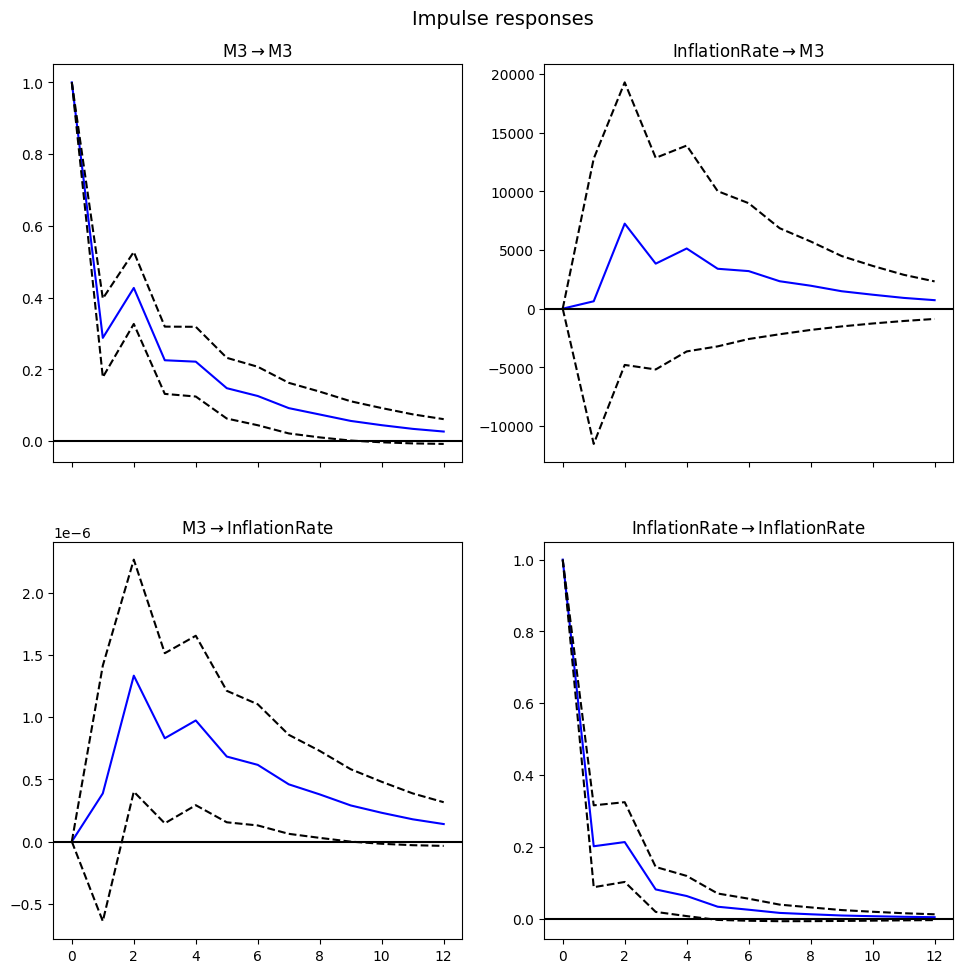

In [148]:
irf = results.irf(12)  # Impulse response function 

# IRF plot
irf.plot(orth=False)
plt.show()